## Perdas de Amonia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df1=pd.read_csv("MF1.csv")
df2=pd.read_csv("MF2.csv")
df3=pd.read_csv("MF3.csv")
df4=pd.read_csv("MF4.csv")
df5=pd.read_csv("MF5.csv")
df6=pd.read_csv("MF6.csv")

In [4]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36001 entries, 0 to 36000
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   TimeStamp                                 36001 non-null  object
 1   Transmissor de Vazao AMÔNIA TANQUE MF-06  36001 non-null  object
dtypes: object(2)
memory usage: 562.6+ KB


In [5]:
df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"] = df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"].replace('<Bad Data>', np.nan)
df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"] = df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"].replace('<Bad Data>', np.nan)
df3["Transmissor de Vazao AMONIA MF-03"] = df3["Transmissor de Vazao AMONIA MF-03"].replace('<Bad Data>', np.nan)
df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"] = df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"].replace('<Bad Data>', np.nan)
df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"] = df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"].replace('<Bad Data>', np.nan)
df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"] = df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"].replace('<Bad Data>', np.nan)

## MF1

In [6]:
df1.isna().sum()

TimeStamp                                            0
Transmissor de Vazao AMONIA PARA O TANQUE MF-01    222
dtype: int64

In [7]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao AMONIA PARA O TANQUE MF-01']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df1[column] = df1[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)


In [8]:
df1['Transmissor de Vazao AMONIA PARA O TANQUE MF-01'] = np.ceil(df1['Transmissor de Vazao AMONIA PARA O TANQUE MF-01'])

In [9]:
df1 = df1[df1['Transmissor de Vazao AMONIA PARA O TANQUE MF-01'] != 0]


In [10]:
df1.describe()

,Transmissor de Vazao AMONIA PARA O TANQUE MF-01
count,31044.000000
mean,60.162286
std,45.703818
min,1.000000
25%,1.000000
50%,86.000000
75%,100.000000
max,198.000000


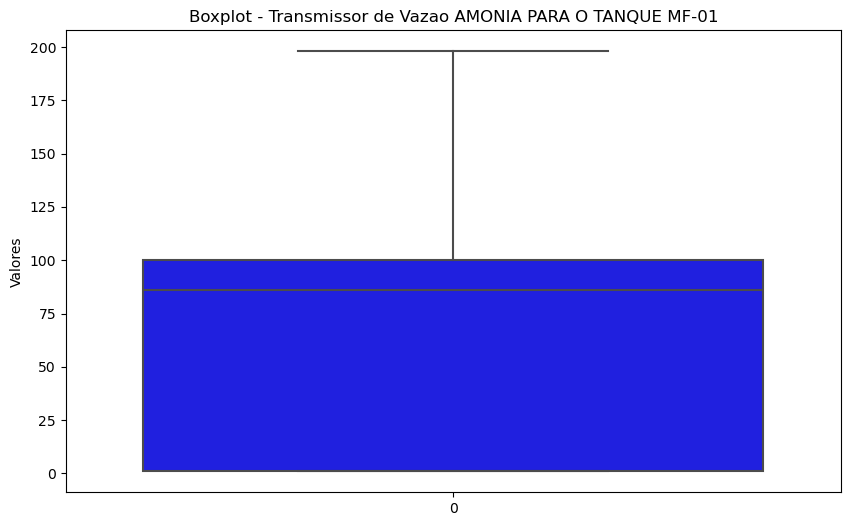

In [11]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df1['Transmissor de Vazao AMONIA PARA O TANQUE MF-01'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMONIA PARA O TANQUE MF-01')
plt.ylabel('Valores')
plt.show()



In [12]:
df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"] = df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"].fillna(60.16)

In [13]:
df1 = df1[df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"]<=197.21]

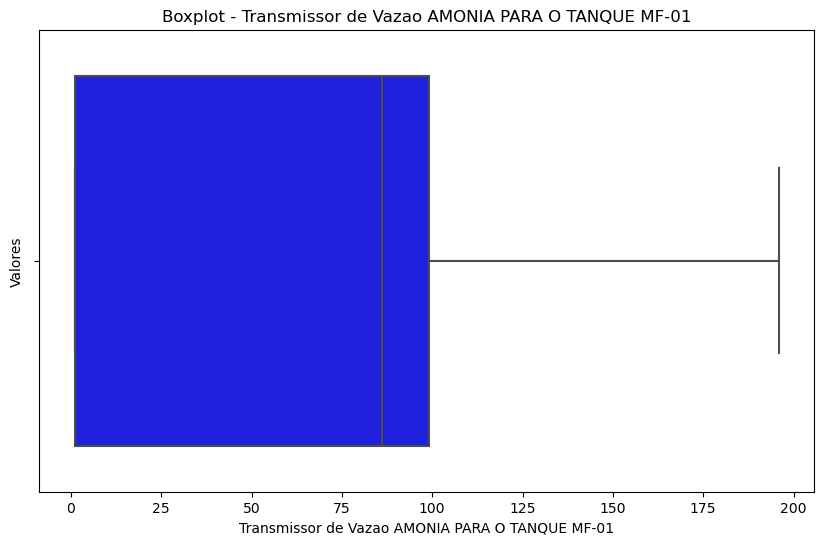

In [14]:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df1['Transmissor de Vazao AMONIA PARA O TANQUE MF-01'], color="blue")
    plt.title('Boxplot - Transmissor de Vazao AMONIA PARA O TANQUE MF-01')
    plt.ylabel('Valores')
    plt.show()




In [15]:
total_vazao = df1["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"].sum()

In [16]:
total_vazao

1880835.52

In [17]:

df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])

# Agora, vamos agrupar os dados por hora e calcular a média de vazão para cada hora
df1_hourly = df1.groupby(df1['TimeStamp'].dt.floor('H')).mean()

# Finalmente, vamos somar todas as médias para obter o totalizador mensal
total_vazao_mensal = df1_hourly["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")


A quantidade total de vazão que passou pelo medidor ao longo do mês é: 31656.628052483324


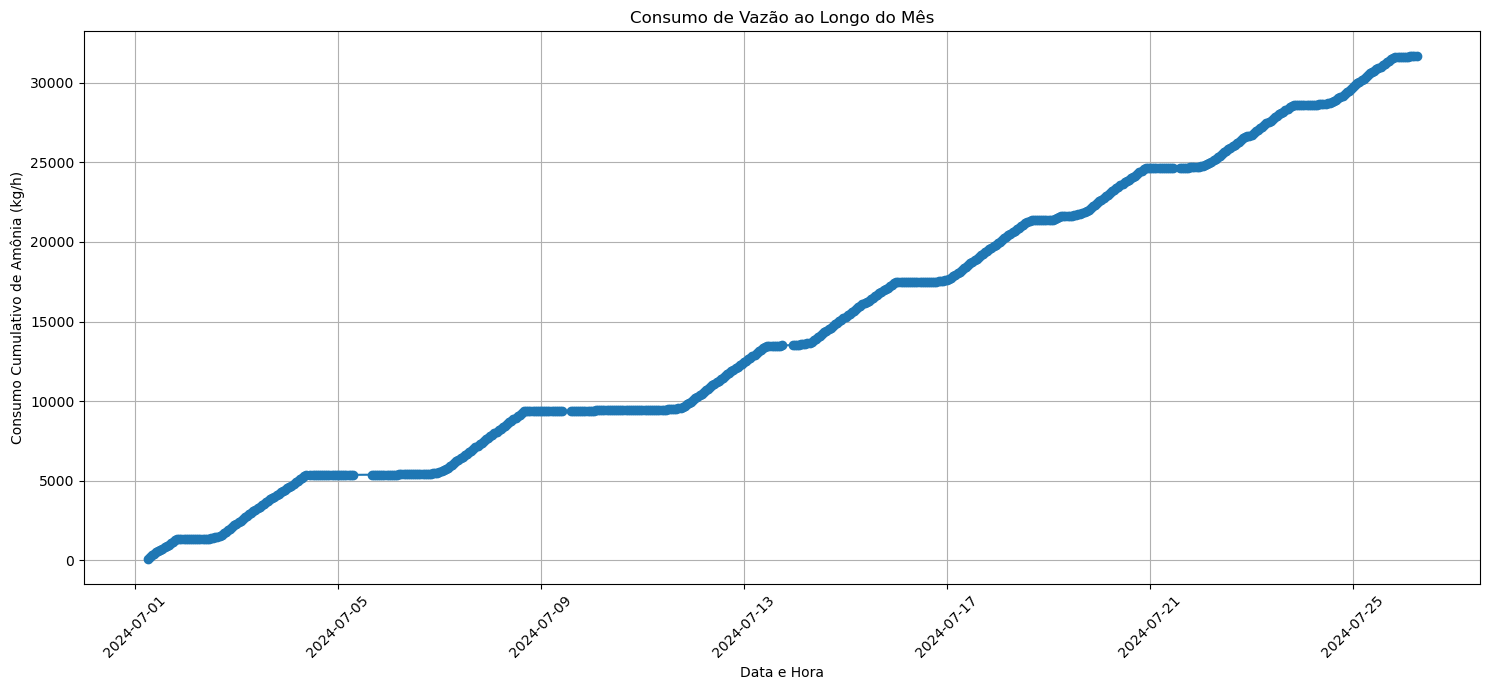

In [18]:

df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])


df1_hourly = df1.groupby(df1['TimeStamp'].dt.floor('H')).mean()


df1_hourly['Cumulative_Vazao'] = df1_hourly["Transmissor de Vazao AMONIA PARA O TANQUE MF-01"].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df1_hourly.index, df1_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## MF2

In [19]:
df2.isna().sum()

TimeStamp                                            0
Transmissor de Vazao AMONIA PARA O TANQUE MF-02    274
dtype: int64

In [20]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao AMONIA PARA O TANQUE MF-02']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df2[column] = df2[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)


In [21]:
df2 = df2[df2['Transmissor de Vazao AMONIA PARA O TANQUE MF-02'] != 0]

In [22]:
df2['Transmissor de Vazao AMONIA PARA O TANQUE MF-02'] = np.ceil(df2['Transmissor de Vazao AMONIA PARA O TANQUE MF-02'])

In [23]:
df2.describe()

,Transmissor de Vazao AMONIA PARA O TANQUE MF-02
count,32612.000000
mean,62.147890
std,48.579313
min,1.000000
25%,1.000000
50%,91.000000
75%,104.000000
max,200.000000


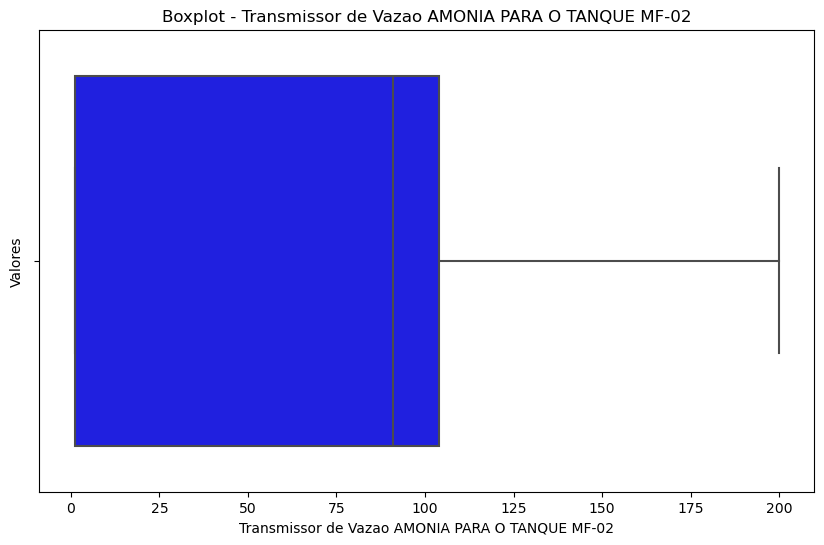

In [24]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df2['Transmissor de Vazao AMONIA PARA O TANQUE MF-02'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMONIA PARA O TANQUE MF-02')
plt.ylabel('Valores')
plt.show()


In [25]:
df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"] = df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"].fillna(62.16)

In [26]:
df2 = df2[df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"]<=200]

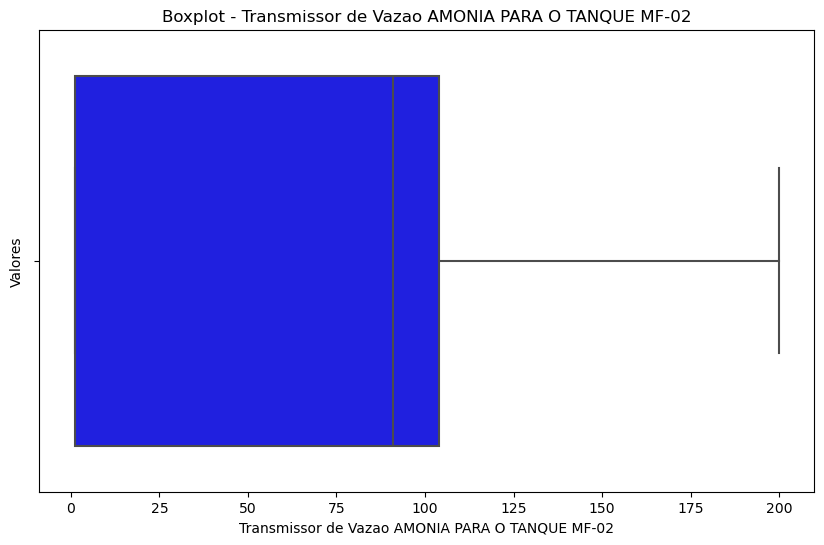

In [27]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df2['Transmissor de Vazao AMONIA PARA O TANQUE MF-02'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMONIA PARA O TANQUE MF-02')
plt.ylabel('Valores')
plt.show()


In [28]:
total_vazao2 = df2["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"].sum()

In [29]:
import pandas as pd

# Supondo que df1 é o DataFrame que contém as colunas "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'" e "TimeStamp"
# Primeiro, vamos garantir que a coluna TimeStamp seja do tipo datetime
df2['TimeStamp'] = pd.to_datetime(df2['TimeStamp'])

# Agora, vamos agrupar os dados por hora e calcular a média de vazão para cada hora
df2_hourly = df2.groupby(df2['TimeStamp'].dt.floor('H')).mean()

# Finalmente, vamos somar todas as médias para obter o totalizador mensal
total_vazao_mensal = df2_hourly["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é: 34435.36519443759


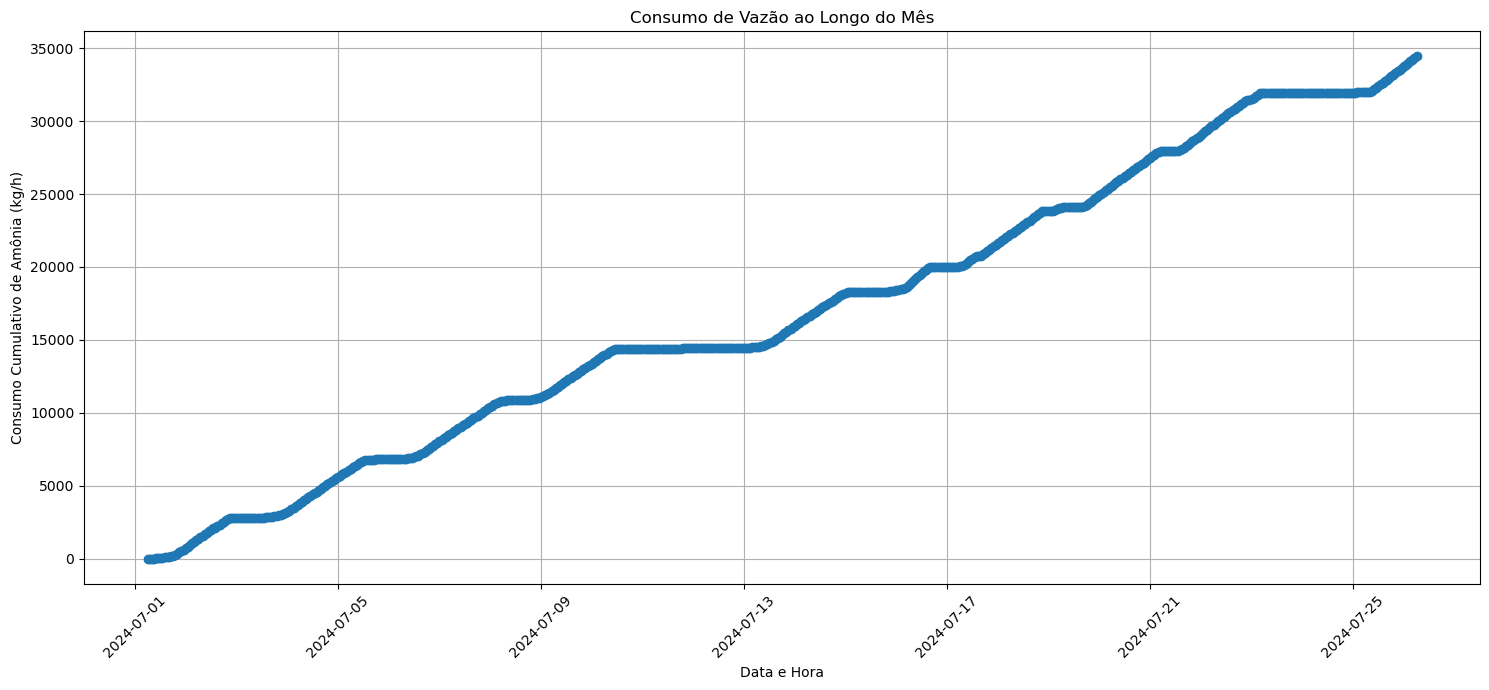

In [30]:

df2_hourly = df2.groupby(df2['TimeStamp'].dt.floor('H')).mean()


df2_hourly['Cumulative_Vazao'] = df2_hourly["Transmissor de Vazao AMONIA PARA O TANQUE MF-02"].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df2_hourly.index, df2_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## MF3

In [31]:
df3.isna().sum()

TimeStamp                              0
Transmissor de Vazao AMONIA MF-03    220
dtype: int64

In [32]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao AMONIA MF-03']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df3[column] = df3[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [33]:
df3 = df3[df3['Transmissor de Vazao AMONIA MF-03'] != 0]

In [34]:
df3['Transmissor de Vazao AMONIA MF-03'] = np.ceil(df3['Transmissor de Vazao AMONIA MF-03'])

In [35]:
df3.describe()

,Transmissor de Vazao AMONIA MF-03
count,30735.000000
mean,63.884301
std,41.331824
min,1.000000
25%,12.000000
50%,87.000000
75%,95.000000
max,168.000000


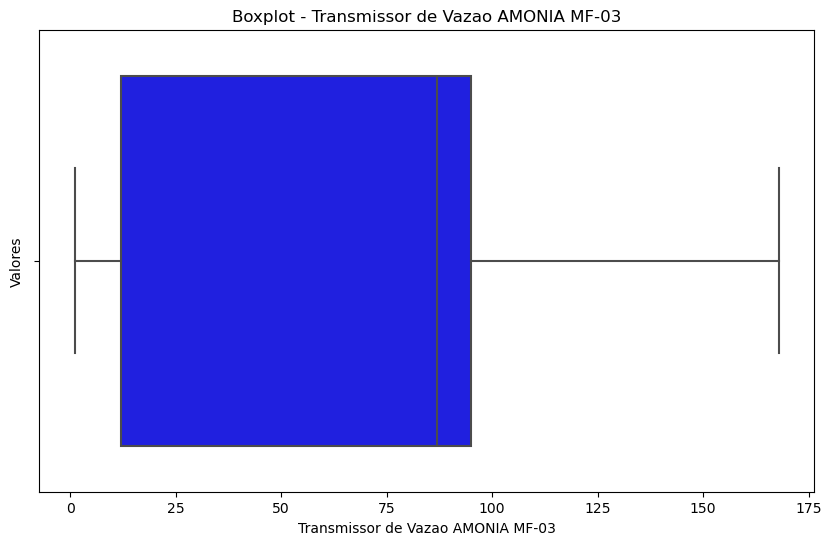

In [36]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df3['Transmissor de Vazao AMONIA MF-03'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMONIA MF-03')
plt.ylabel('Valores')
plt.show()

In [37]:
df3["Transmissor de Vazao AMONIA MF-03"] = df3["Transmissor de Vazao AMONIA MF-03"].fillna(63.88)

In [38]:
df3 = df3[df3["Transmissor de Vazao AMONIA MF-03"]<=167]

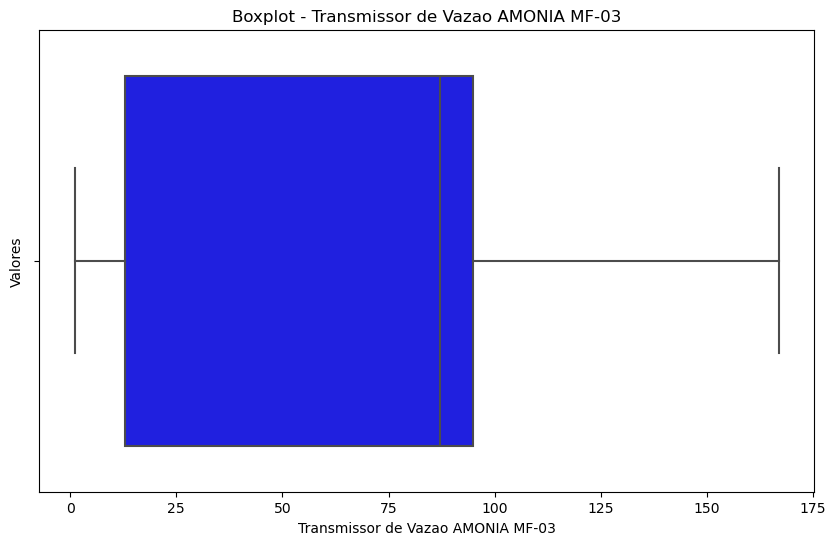

In [39]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df3['Transmissor de Vazao AMONIA MF-03'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMONIA MF-03')
plt.ylabel('Valores')
plt.show()


In [40]:
total_vazao3 = df3["Transmissor de Vazao AMONIA MF-03"].sum()

In [41]:
total_vazao3

1977369.6

In [42]:

df3['TimeStamp'] = pd.to_datetime(df3['TimeStamp'])

df3_hourly = df3.groupby(df3['TimeStamp'].dt.floor('H')).mean()

total_vazao_mensal = df3_hourly["Transmissor de Vazao AMONIA MF-03"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é: 33378.13849744582


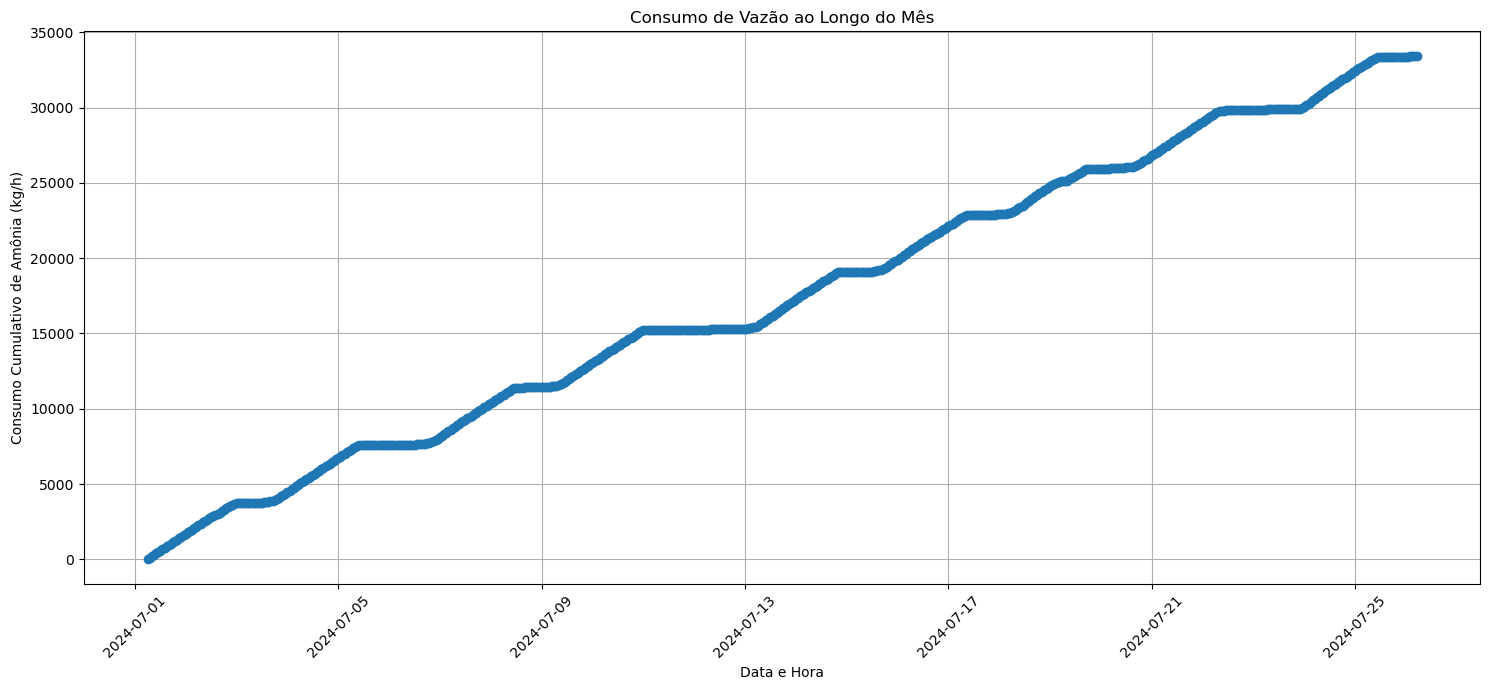

In [43]:
df3_hourly = df3.groupby(df2['TimeStamp'].dt.floor('H')).mean()


df3_hourly['Cumulative_Vazao'] = df3_hourly["Transmissor de Vazao AMONIA MF-03"].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df3_hourly.index, df3_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## MF4

In [44]:
df4.isna().sum()

TimeStamp                                        0
Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4    220
dtype: int64

In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36001 entries, 0 to 36000
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   TimeStamp                                    36001 non-null  object
 1   Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4  35781 non-null  object
dtypes: object(2)
memory usage: 562.6+ KB


In [46]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df4[column] = df4[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [47]:

df4 = df4[df4['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4'] != 0]




In [48]:
df4['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4'] = np.ceil(df4['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4'])

In [49]:
df4.describe()

,Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4
count,10488.000000
mean,78.603356
std,35.528794
min,2.000000
25%,64.000000
50%,95.000000
75%,103.000000
max,196.000000


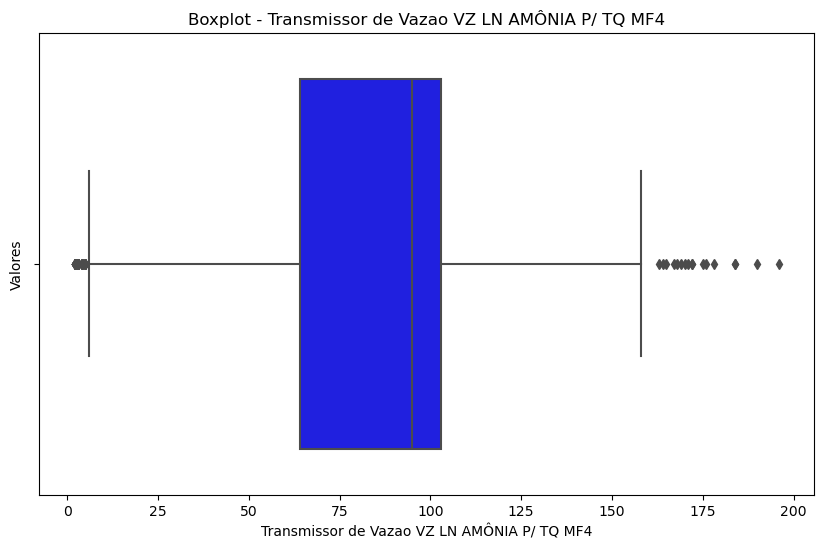

In [50]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df4['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4')
plt.ylabel('Valores')
plt.show()

In [51]:
df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"] = df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"].fillna(14.47)

In [52]:
df4 = df4[df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"]<=30]

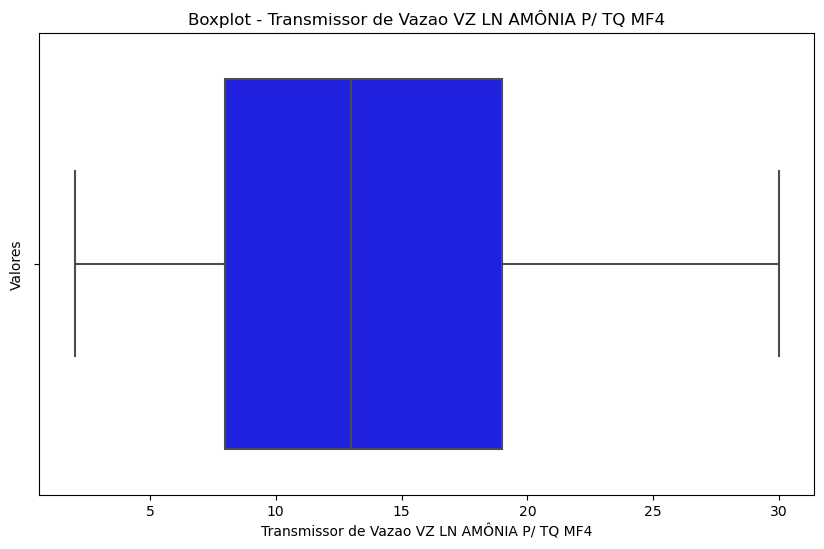

In [53]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df4['Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4')
plt.ylabel('Valores')
plt.show()


In [54]:
total_vazao4 = df4["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"].sum()

In [55]:
total_vazao4

31833.4

In [56]:

df4['TimeStamp'] = pd.to_datetime(df4['TimeStamp'])

df4_hourly = df4.groupby(df3['TimeStamp'].dt.floor('H')).mean()

total_vazao_mensal = df4_hourly["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é: 912.4162608981835


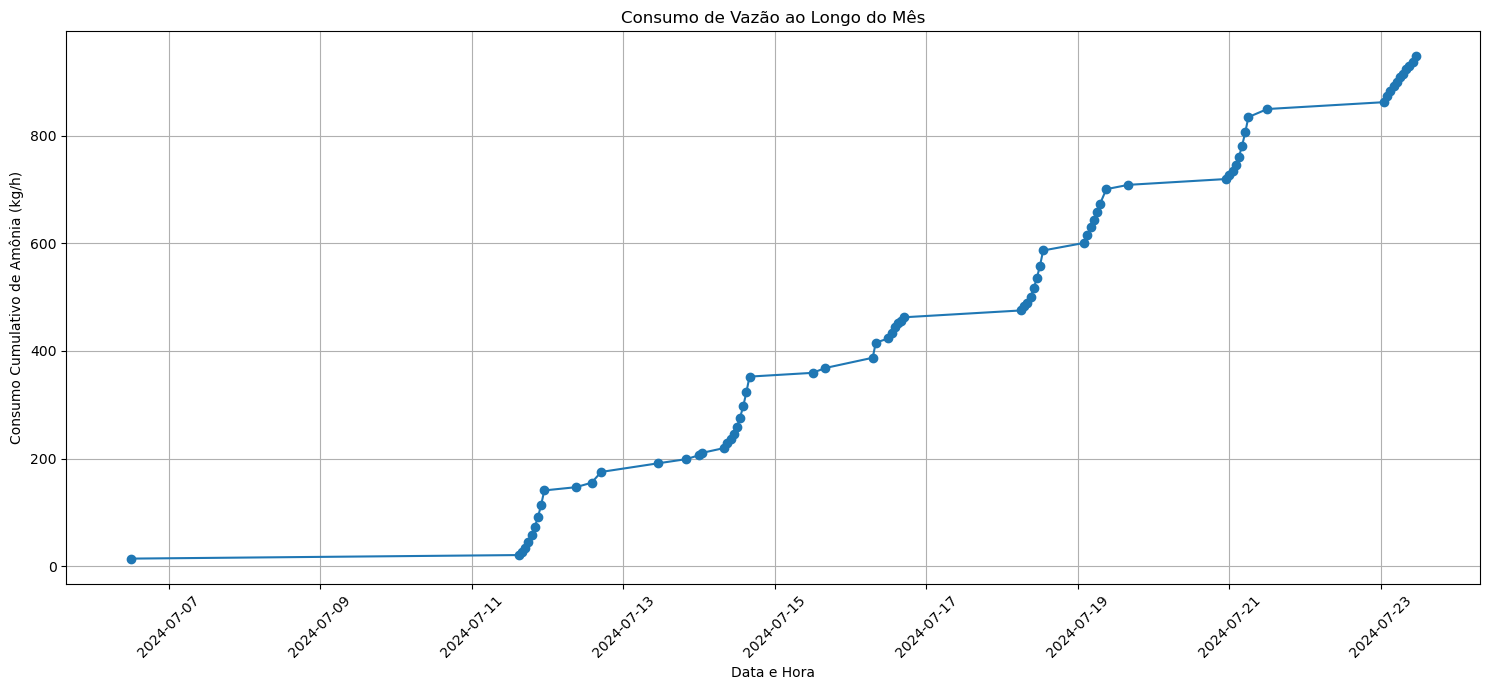

In [57]:
df4_hourly = df4.groupby(df4['TimeStamp'].dt.floor('H')).mean()


df4_hourly['Cumulative_Vazao'] = df4_hourly["Transmissor de Vazao VZ LN AMÔNIA P/ TQ MF4"].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df4_hourly.index, df4_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## MF5

In [58]:
df5.isna().sum()

TimeStamp                                     0
Transmissor de Vazao AMÔNIA TANQUE MF-05    214
dtype: int64

In [59]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36001 entries, 0 to 36000
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   TimeStamp                                 36001 non-null  object
 1   Transmissor de Vazao AMÔNIA TANQUE MF-05  35787 non-null  object
dtypes: object(2)
memory usage: 562.6+ KB


In [60]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao AMÔNIA TANQUE MF-05']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df5[column] = df5[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [61]:
df5 = df5[df5['Transmissor de Vazao AMÔNIA TANQUE MF-05'] != 0]




In [62]:
df5['Transmissor de Vazao AMÔNIA TANQUE MF-05'] = np.ceil(df5['Transmissor de Vazao AMÔNIA TANQUE MF-05'])

In [63]:
df5.describe()

,Transmissor de Vazao AMÔNIA TANQUE MF-05
count,2496.000000
mean,46.032853
std,45.841118
min,2.000000
25%,10.000000
50%,20.000000
75%,105.000000
max,131.000000


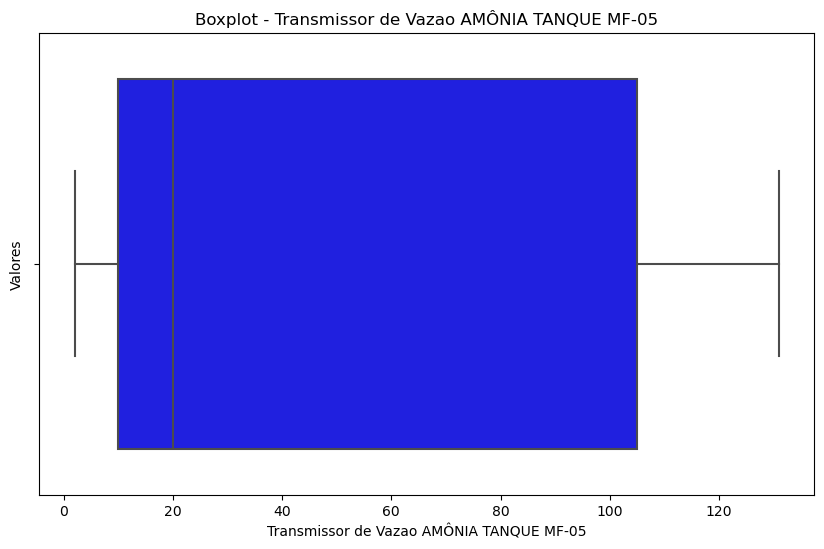

In [64]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df5['Transmissor de Vazao AMÔNIA TANQUE MF-05'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMÔNIA TANQUE MF-05')
plt.ylabel('Valores')
plt.show()

In [65]:
df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"] = df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"].fillna(45.99)

In [66]:
df5 = df5[df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"]<=130]


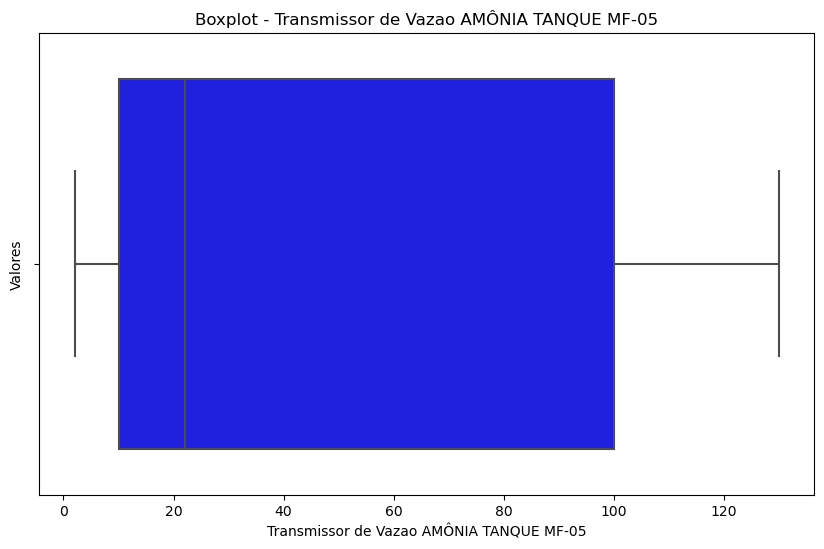

In [67]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df5['Transmissor de Vazao AMÔNIA TANQUE MF-05'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMÔNIA TANQUE MF-05')
plt.ylabel('Valores')
plt.show()

In [68]:
total_vazao5 = df5["Transmissor de Vazao AMÔNIA TANQUE MF-05"].sum()

In [69]:
total_vazao5

124608.86

In [70]:

df5['TimeStamp'] = pd.to_datetime(df5['TimeStamp'])

df5_hourly = df5.groupby(df5['TimeStamp'].dt.floor('H')).mean()

total_vazao_mensal = df5_hourly["Transmissor de Vazao AMÔNIA TANQUE MF-05"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é: 2791.823317172038


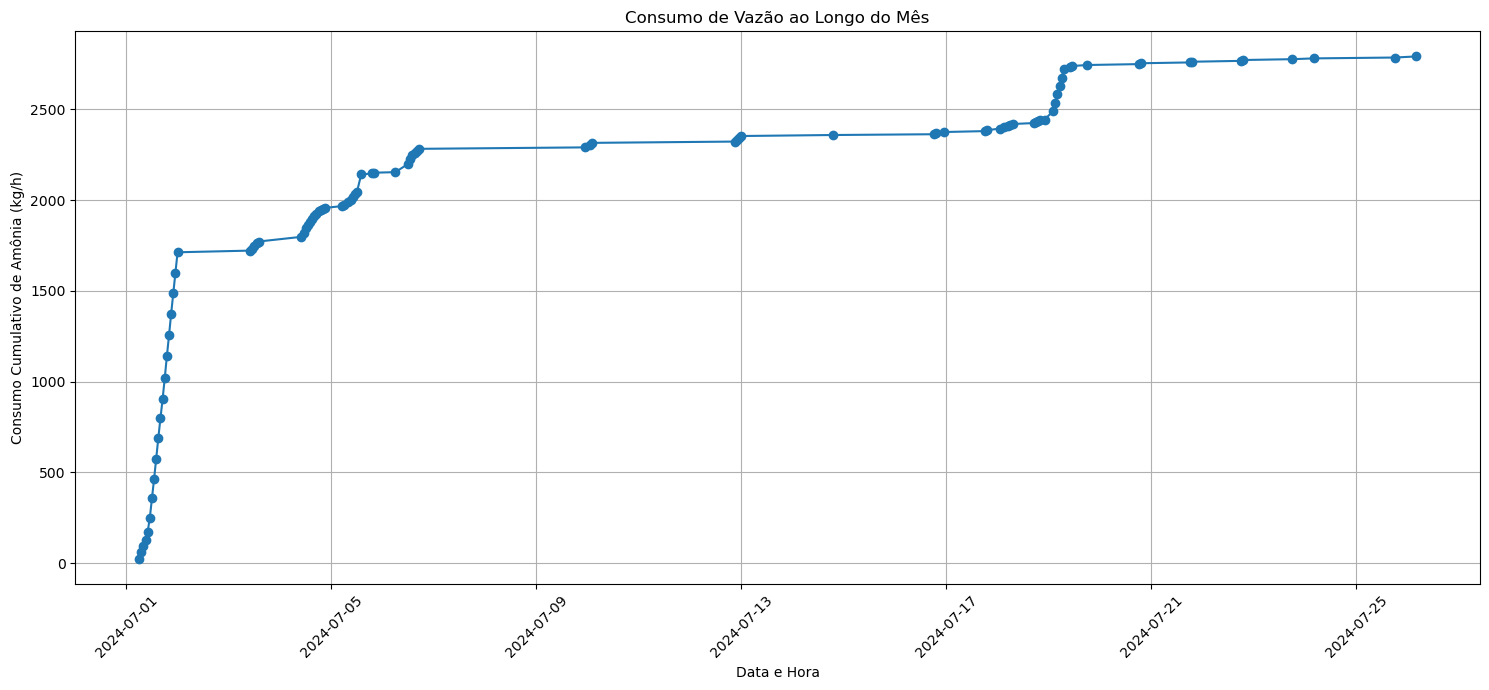

In [71]:
df5_hourly = df5.groupby(df5['TimeStamp'].dt.floor('H')).mean()


df5_hourly['Cumulative_Vazao'] = df5_hourly['Transmissor de Vazao AMÔNIA TANQUE MF-05'].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df5_hourly.index, df5_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')
plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## MF6

In [72]:
df6.isna().sum()

TimeStamp                                     0
Transmissor de Vazao AMÔNIA TANQUE MF-06    214
dtype: int64

In [73]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36001 entries, 0 to 36000
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   TimeStamp                                 36001 non-null  object
 1   Transmissor de Vazao AMÔNIA TANQUE MF-06  35787 non-null  object
dtypes: object(2)
memory usage: 562.6+ KB


In [74]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao AMÔNIA TANQUE MF-06']

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df6[column] = df6[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [75]:
df6 = df6[df6['Transmissor de Vazao AMÔNIA TANQUE MF-06'] != 0]



In [76]:
df6['Transmissor de Vazao AMÔNIA TANQUE MF-06'] = np.ceil(df6['Transmissor de Vazao AMÔNIA TANQUE MF-06'])

In [77]:
df6.describe()

,Transmissor de Vazao AMÔNIA TANQUE MF-06
count,6143.000000
mean,73.520918
std,45.844433
min,2.000000
25%,18.000000
50%,94.000000
75%,108.000000
max,200.000000


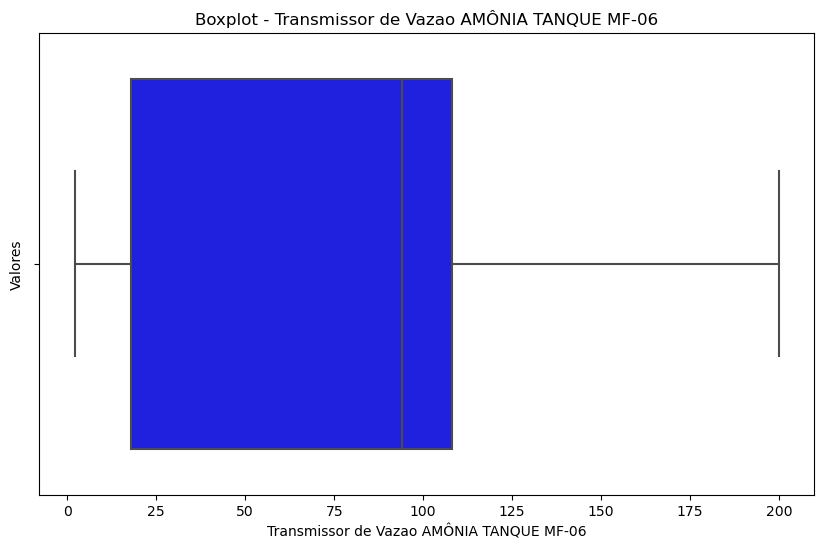

In [78]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df6['Transmissor de Vazao AMÔNIA TANQUE MF-06'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMÔNIA TANQUE MF-06')
plt.ylabel('Valores')
plt.show()

In [79]:
df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"] = df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"].fillna(73)

In [80]:
df6 = df6[df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"]<=200]

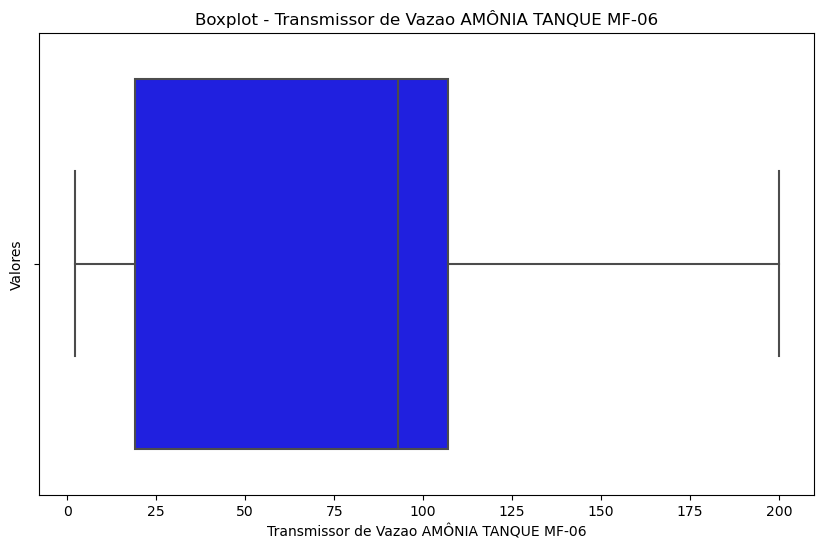

In [81]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(x = df6['Transmissor de Vazao AMÔNIA TANQUE MF-06'], color = "blue")
plt.title('Boxplot - Transmissor de Vazao AMÔNIA TANQUE MF-06')
plt.ylabel('Valores')
plt.show()

In [82]:
total_vazao6 = df6["Transmissor de Vazao AMÔNIA TANQUE MF-06"].sum()

In [83]:
total_vazao6

467261.0

In [84]:

df6['TimeStamp'] = pd.to_datetime(df6['TimeStamp'])

df6_hourly = df6.groupby(df6['TimeStamp'].dt.floor('H')).mean()

total_vazao_mensal = df6_hourly["Transmissor de Vazao AMÔNIA TANQUE MF-06"].sum()

print(f"A quantidade total de vazão que passou pelo medidor ao longo do mês é: {total_vazao_mensal}")

A quantidade total de vazão que passou pelo medidor ao longo do mês é: 10130.771319671467


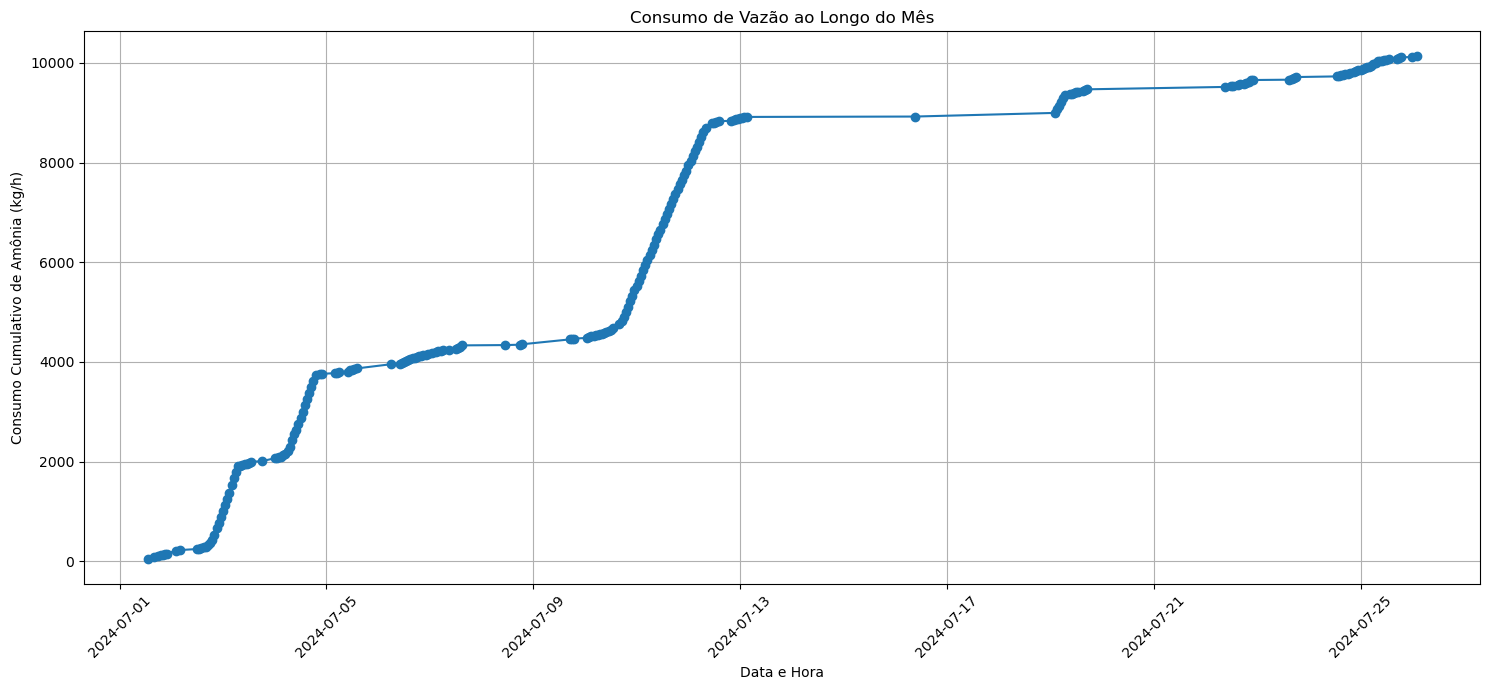

In [85]:
df6_hourly = df6.groupby(df6['TimeStamp'].dt.floor('H')).mean()


df6_hourly['Cumulative_Vazao'] = df6_hourly['Transmissor de Vazao AMÔNIA TANQUE MF-06'].cumsum()

# Agora, vamos criar um gráfico de linha para mostrar o consumo aumentando ao longo do mês
plt.figure(figsize=(15, 7))
plt.plot(df6_hourly.index, df6_hourly['Cumulative_Vazao'], marker='o')
plt.title('Consumo de Vazão ao Longo do Mês')

plt.xlabel('Data e Hora')
plt.ylabel('Consumo Cumulativo de Amônia (kg/h)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()